In [48]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science'])
from scipy.optimize import curve_fit

In [49]:
def n(wl):
    # refractive index of BK7 glass
    wl_um = wl * 1e6  # convert wavelength from meters to micrometers
    return np.sqrt(1+1.03961*wl_um**2/(wl_um**2-0.0060007)+0.23179*wl_um**2/(wl_um**2-0.020018)+1.01047*wl_um**2/(wl_um**2-103.5600))

def gamma(theta, n):
    # Snell's law
    return np.asin(np.sin(theta) / n)

def xg(theta,d,n):
    # length through the glass
    return d/np.cos(gamma(theta,n))

def xa(theta,d,n):
    # length through the air
    return xg(theta,d,n)*np.cos(theta-gamma(theta,n))

def linear_func(x, a, b):
    return a * x + b

In [50]:
f = 2500 / 60 # motor speed in Hz
d = 9.7e-3 # thickness of the glass in meters
wl = 820e-9 # wavelength in meters
theta_0 = np.deg2rad(42) # initial angle in radians
c = 3e8 # speed of light in m/s

t = np.linspace(-100e-6, 100e-6, 50) # time array in seconds
theta = theta_0 + 2 * np.pi * f * t # angle array in radians

n_wl = n(wl)
xg0 = xg(theta_0, d, n_wl)
xa0 = xa(theta_0, d, n_wl)
xgt = xg(theta, d, n_wl)
xat = xa(theta, d, n_wl)

delta_t = (2/c)*(n_wl*(xgt - xg0) - (xat - xa0)) # time delay array in seconds

# Linear fit
popt, pcov = curve_fit(linear_func, t, delta_t)

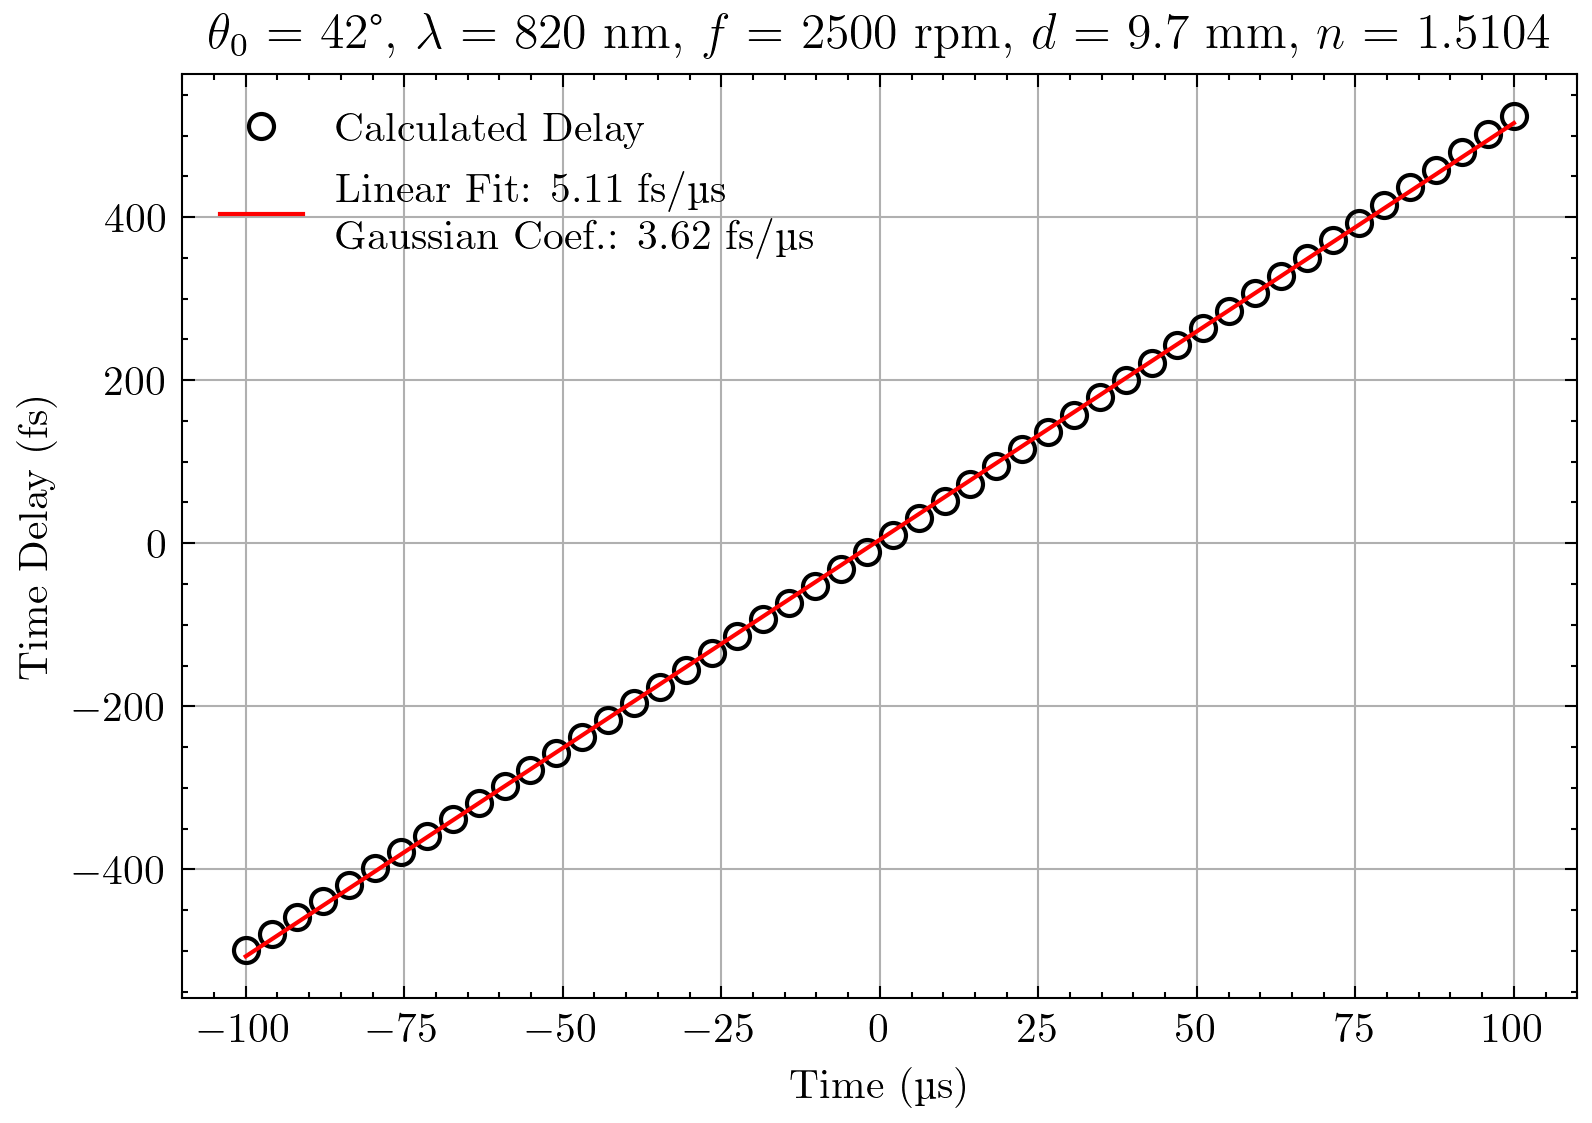

In [51]:
plt.figure(figsize=(6,4), dpi=300)
plt.plot(t * 1e6, delta_t * 1e15, 'ko',label='Calculated Delay', mfc='none')
plt.plot(t * 1e6, linear_func(t, *popt) * 1e15, 'r-', label='Linear Fit: {:.2f} fs/µs\n Gaussian Coef.: {:.2f} fs/µs'.format(popt[0]*1e9, popt[0]*1e9/1.414))
plt.xlabel('Time (µs)')
plt.ylabel('Time Delay (fs)')
plt.title(r'$\theta_0$ = {:.0f}°, $\lambda$ = {:.0f} nm, $f$ = {:.0f} rpm, $d$ = {:.1f} mm, $n$ = {:.4f}'.format(np.rad2deg(theta_0), wl*1e9, f*60, d*1e3, n_wl))
plt.grid(True)
plt.legend()

In [52]:
n_wl

np.float64(1.5103873606472908)